In [1]:
from skimage import io
from skimage import data

In [2]:
coin=data.coins()

In [3]:
import matplotlib.pyplot as plt

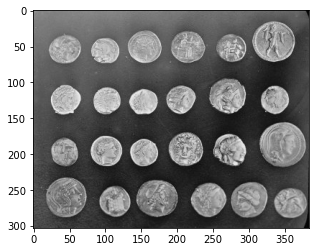

In [5]:
plt.imshow(coin,cmap='gray')

In [6]:
from skimage.filters import sobel
elevation_map=sobel(coin)

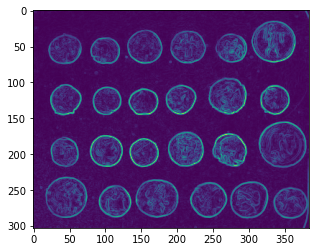

In [7]:
plt.imshow(elevation_map)

In [9]:
import numpy as np

In [10]:
markers=np.zeros_like(coin)

In [11]:
markers[coin<30]=1
markers[coin>150]=2

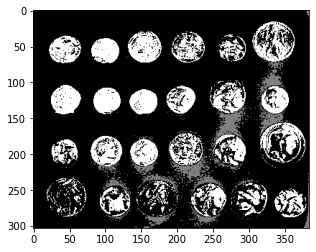

In [13]:
plt.imshow(markers,cmap='gray')

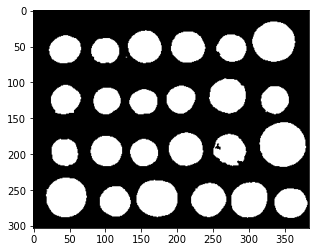

In [15]:
from skimage.segmentation import watershed
seg=watershed(elevation_map,markers)
plt.imshow(seg,cmap='gray')

In [14]:
from skimage.color import label2rgb

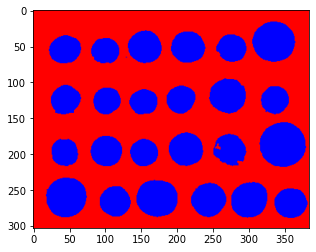

In [16]:
seg_rgb=label2rgb(seg,bg_label=0)
plt.imshow(seg_rgb)

C:\Users\MUHAMMED FAISAL\AppData\Local\Temp\ipykernel_4800\4262422612.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  img_overlay=label2rgb(labeled,image=coin)


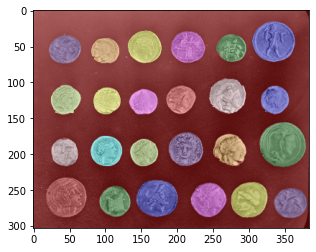

In [19]:
from scipy import ndimage as ndi
segmented_coins=ndi.binary_fill_holes(seg-1)
labeled,_=ndi.label(segmented_coins)
img_overlay=label2rgb(labeled,image=coin)
plt.imshow(img_overlay)